# MODEL VALIDATION

## Basics

Predictive tasks fall into one of two categories: regression or classification. In the candy dataset, the outcome is a continuous variable describing how often the candy was chosen over another candy in a series of 1-on-1 match-ups. To predict this value (the win-percentage), regression model is used.

#### Getting data

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r'candy-data.csv')

In [7]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [8]:
y=df['winpercent'].values

In [9]:
X=df.drop(['winpercent','competitorname'], axis =1)

In [10]:
X.head(3)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116


In [11]:
print(X.shape,y.shape)

(85, 11) (85,)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Set parameters and fit a model

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rfr = RandomForestRegressor()

In [17]:
# Set the number of trees
rfr.n_estimators = 100

# Add a maximum depth
rfr.max_depth = 6

# Set the random state
rfr.random_state = 1111

# Fit the model
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=1111)

### Feature importances

In [19]:
import numpy as np

In [20]:
# Print how important each column is to the model
for i, item in enumerate(rfr.feature_importances_):
      # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

chocolate: 0.42
fruity: 0.03
caramel: 0.02
peanutyalmondy: 0.06
nougat: 0.00
crispedricewafer: 0.02
hard: 0.01
bar: 0.08
pluribus: 0.02
sugarpercent: 0.17
pricepercent: 0.16


enumerate() function: it can loop over a list while also creating an automatic counter.

### Creating train, test, and validation datasets

In [23]:
from sklearn.model_selection import train_test_split

#### **Create one holdout set**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

#### **Create two holdout sets**
When testing parameters, tuning hyper-parameters, or anytime you are frequently evaluating model performance.

In [27]:
# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test  =\
    train_test_split(X, y, test_size=0.2, random_state=2) # temp, test w/ X,y

# Create the final training and validation datasets
X_train, X_val, y_train, y_val =\
    train_test_split(X_temp, y_temp, test_size=0.25, random_state=2) # train, val w/ temp

### Accuracy metrics: regression models

**MSE: mean squared error**

In [29]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error

n = len(predictions)
# Manual calculation of the MSE
mse_one = sum((y_test - predictions)**2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mse_two))

With a manual calculation, the error is 109.86091031801962
Using scikit-learn, the error is 109.86091031801965


### Bias-variance trade-off 
Variance = following training data too closely, leading to overfitting<br/>
Bias = failing to find relationship b/w data and response, leading to underfitting

#### Error due to under/over-fitting
High training error = UNDERFITTING <BR/>
Training error << testing error => OVERFITTING


In [33]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=11)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(
  mean_squared_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mean_squared_error(y_test, rfr.predict(X_test))))

The training error is 18.86
The testing error is 112.43


n_estimators = number of trees (or models) in the ensemble. <br/>
max_features = maximum number of features a single tree is allowed to consider for splitting at each node.

In [35]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=2)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(
  mean_squared_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mean_squared_error(y_test, rfr.predict(X_test))))

The training error is 18.21
The testing error is 105.56


In [36]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=20,
                            random_state=1111,
                            max_features=4)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(
  mean_squared_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mean_squared_error(y_test, rfr.predict(X_test))))

The training error is 20.63
The testing error is 88.17


##### Visualizing Bias - Variance trade-off

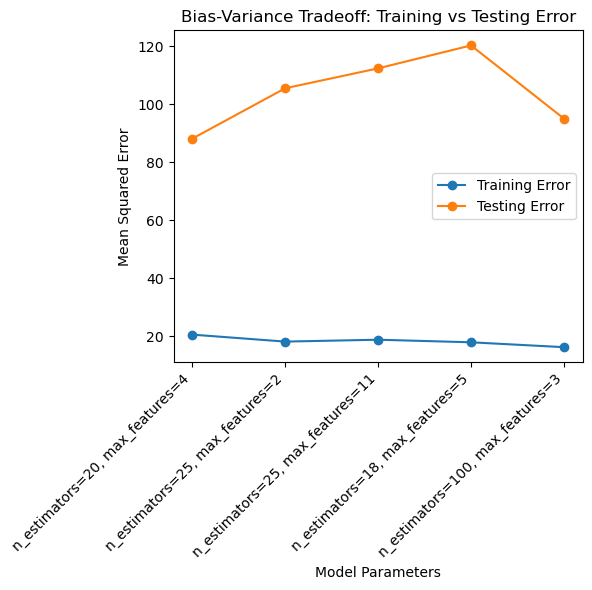

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter combinations for n_estimators and max_features
param_combinations = [(20, 4), (25, 2), (25, 11),(18,5),(100,3)]
training_errors = []
testing_errors = []

# Loop through different hyperparameters
for n_estimators, max_features in param_combinations:
    # Train the Random Forest Regressor
    rfr = RandomForestRegressor(n_estimators=n_estimators,
                                random_state=1111,
                                max_features=max_features)
    rfr.fit(X_train, y_train)
    
    # Compute training and testing errors
    train_error = mean_squared_error(y_train, rfr.predict(X_train))
    test_error = mean_squared_error(y_test, rfr.predict(X_test))
    
    training_errors.append(train_error)
    testing_errors.append(test_error)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))

x_labels = [f"n_estimators={x[0]}, max_features={x[1]}" for x in param_combinations]
x_pos = np.arange(len(param_combinations))

ax.plot(x_pos, training_errors, label='Training Error', marker='o')
ax.plot(x_pos, testing_errors, label='Testing Error', marker='o')

ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel('Model Parameters')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Bias-Variance Tradeoff: Training vs Testing Error')
ax.legend()

plt.tight_layout()
plt.show()


## Cross Validation
**If our models are not generalizing well or if we have limited data**

splitting the data into multiple subsets, training on some while testing on others, and averaging the results to ensure generalization.

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv(r'candy-data.csv')

In [43]:
X=df.drop(['winpercent','competitorname'], axis =1)

In [44]:
y=df['winpercent'].values

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **sklearn's cross_val_score()**

In [48]:
# Load the cross-validation method
from sklearn.model_selection import cross_val_score

Parameters:<br/>
estimator: model to use <br/>
X: training dataset<br/>
y: response array<br/>
cv: cross-validation splits <br/>

it will use the default scoring function of the model | for regression it is r square

else can use **make_scorer** method

In [52]:
# load model
from sklearn.ensemble import RandomForestRegressor

In [53]:
#Load the mean squared error method
#Load the function for creating a scorer
from sklearn.metrics import mean_squared_error, make_scorer

#### Implement cross_val_score()

In [55]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc,
                     X=X_train,
                     y=y_train,
                     cv=10,
                     scoring=mse)

# Print the mean error
print(cv.mean())

134.0420179293679


### **Leave-one-out-cross-validation (LOOCV)**
**Use when data is limited, but computationally expensive**

In [57]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Implement LOOCV
scores = cross_val_score(estimator = rfr, X=X, y=y, cv= X.shape[0], scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 9.52044832324183.
The standard deviation of the errors is: 7.349020637882744.


## Selecting the best model with Hyperparameter tuning

Hyperparameter = parameters set **BEFORE** training occurs

In [60]:
# Review the parameters of rfr
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1111,
 'verbose': 0,
 'warm_start': False}

In [61]:
# Maximum Depth
max_depth = [4, 8, 12]

# Minimum samples for a split
min_samples_split = [2, 5, 10]

# Max features 
max_features = [4, 6, 8, 10]

In [62]:
from sklearn.ensemble import RandomForestRegressor
import random

# Fill in rfr using your variables
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=random.choice(max_depth),
    min_samples_split=random.choice(min_samples_split),
    max_features=random.choice(max_features))

# Print out the parameters
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 8, 'max_features': 6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### RandomizedSearchCV

Preparing for RandomizedSearch

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

param_dist = {"max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

# Create a random forest regression model
rfr = RandomForestRegressor(n_estimators=10, random_state=1111)

# Create a scorer to use (use the mean squared error)
scorer = make_scorer(mean_squared_error)

Implementing RandomizedSearchCV<br/>
w/ 5-fold cross validation for this random search:

In [67]:
# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
random_search =\
    RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring=scorer)

In [68]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=1111),
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 16]},
                   scoring=make_scorer(mean_squared_error))

In [69]:
# print the mean test scores:
print('The accuracy for each run was: {}.'.format(random_search.cv_results_['mean_test_score']))

The accuracy for each run was: [157.10958129 141.97256174 141.6901116  135.18268134 134.94911687
 132.82148424 136.32776996 148.00024942 133.46924609 151.90895473].


For mean square error lowest is better, so other attributes of RSCV won't be useful

can use r square, which is default scorer

#### Using r squared as scorer

In [73]:
from sklearn.metrics import r2_score

In [74]:
# Create a scorer to use (use r squared)
scorer = make_scorer(r2_score)

In [75]:
# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
random_search =\
    RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring=scorer)

In [76]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=1111),
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 16]},
                   scoring=make_scorer(r2_score))

In [77]:
# print the mean test scores:
print('The accuracy for each run was: {}.'.format(random_search.cv_results_['mean_test_score']))

The accuracy for each run was: [0.240277   0.25553314 0.23948863 0.20894193 0.21693699 0.21158937
 0.29102373 0.30779792 0.29353823 0.26456942].


In [78]:
random_search.best_score_

0.3077979206534475

In [79]:
random_search.best_params_

{'min_samples_split': 4, 'max_features': 2, 'max_depth': 4}

In [80]:
random_search.best_estimator_

RandomForestRegressor(max_depth=4, max_features=2, min_samples_split=4,
                      n_estimators=10, random_state=1111)